In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [188]:
from PIL import Image
import pandas as pd



all = Image.open('../cell3/nice.jpg')
nuc = Image.open('../cell3/nice images/nucleus.jpg')
per = Image.open('../cell3/nice images/peroxisomes.jpg')
lip = Image.open('../cell3/nice images/lipid.jpg')
mit = Image.open('../cell3/nice images/mitochondria.jpg')
er = Image.open('../cell3/nice images/er.jpg')
gol = Image.open('../cell3/nice images/golgi.jpg')


with open("../cell3/preprocess.json", 'r') as file:
    preprocess = json.load(file)


mitochondria_dist = np.array(preprocess["covariates"]["distance"]["mitochondria"])
mitochondria_bin = np.array(preprocess["covariates"]["binary"]["mitochondria"])
nuc_dist = np.array(preprocess["covariates"]["distance"]["nucleus"])
nuc2_dist = np.array(preprocess["covariates"]["distance"]["nucleus2"])
study_area =np.array(preprocess["study area mask"])




cell_contour = preprocess["contour"]["cell"]
nucleus_contour = preprocess["contour"]["nucleus"]

points = preprocess["point patterns"]["peroxisomes"]


with open("../mean_density_est.json", 'r') as file:
    mde = json.load(file)

values = np.array(mde['v'])
values[values == 'NA'] = np.nan
values = values.astype('float')  # Ensure the matrix is of float type to accommodate np.nan
masked_array = np.ma.array(values, mask=np.isnan(values))

mde["image"] = masked_array




mlgcp = dict()
import rasterio
with rasterio.open("../mean_lgcp.tif") as src:
    # Read the raster data
    image = src.read(1)  # Reads the first band
    masked_array = np.ma.array(image, mask= image  < -10)
    mlgcp["image"] = masked_array

    bounds = src.bounds
    # Alternatively, you can construct the extent manually
    mlgcp["extent"] = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]


mnrd = dict()
import rasterio
with rasterio.open("../exp_nrd.tif") as src:
    # Read the raster data
    image = src.read(1)  # Reads the first band
    masked_array = np.ma.array(image, mask= image  < -10)
    mnrd["image"] = masked_array

    bounds = src.bounds
    # Alternatively, you can construct the extent manually
    mnrd["extent"] = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


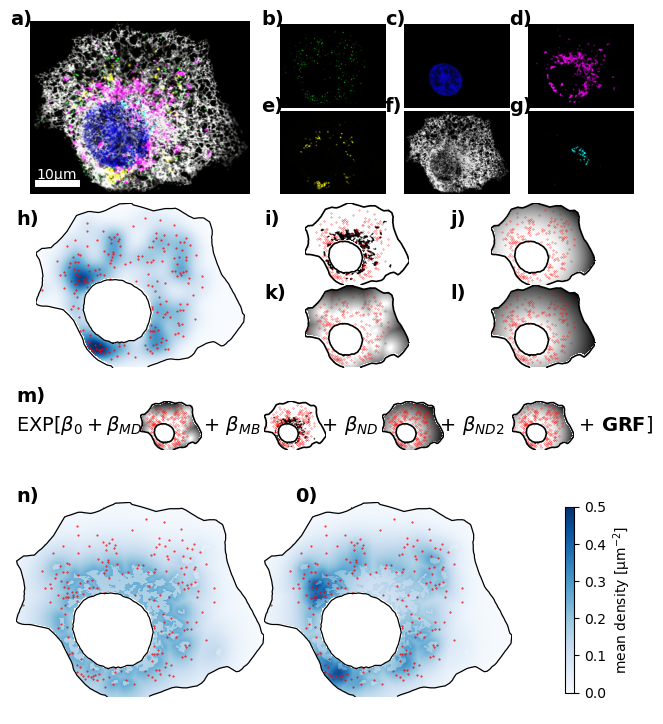

In [312]:
#height_to_width = np.array(nuc).shape[0]/np.array(nuc).shape[1]

scale = 10.8557 #px/um

f, ax = plt.subplots(1, 1,figsize=(8, 9))

ax.axis("off")

#TOP##################################
axs_top = ax.inset_axes([0.0,0.75,1.0,0.25])

original_extend = (0, np.array(all).shape[1]/scale, 0, np.array(all).shape[0]/scale)

#axs_top.axis("off")
ax1 = axs_top.inset_axes([0,0.0,2/5,1.0])
ax1.imshow(all,origin = "lower",extent = original_extend )
ax1.plot([2,12],[3,3],color = "white",linewidth = 5)
ax1.text(7,4,r"$10\mathrm{\mu m}$",horizontalalignment='center',color = "white")



pad = 0.02

ax2 = axs_top.inset_axes([2/5+pad,0.5,1/5-pad,0.5-pad])
ax2.imshow(np.array(per),origin = "lower",extent = original_extend )

ax3 = axs_top.inset_axes([3/5+pad,0.5,1/5-pad,0.5-pad])
ax3.imshow(np.array(nuc),origin = "lower",extent = original_extend )

ax4 = axs_top.inset_axes([4/5+pad,0.5,1/5-pad,0.5-pad])
ax4.imshow(np.array(mit),origin = "lower",extent = original_extend )

ax5 = axs_top.inset_axes([2/5+pad,0.0,1/5-pad,0.5-pad])
ax5.imshow(np.array(lip),origin = "lower",extent = original_extend )

ax6 = axs_top.inset_axes([3/5+pad,0.0,1/5-pad,0.5-pad])
ax6.imshow(np.array(er),origin = "lower",extent = original_extend )

ax7 = axs_top.inset_axes([4/5+pad,0.0,1/5-pad,0.5-pad])
ax7.imshow(np.array(gol),origin = "lower",extent = original_extend )


axs_top.axis("off")
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
ax5.axis("off")
ax6.axis("off")
ax7.axis("off")

# MID ############

axs_mid = ax.inset_axes([0.0,0.5,1.0,0.25*0.95])
axs_est = axs_mid.inset_axes([0.0,0.0,2/5,1])
axs_cov = axs_mid.inset_axes([2/5,0.0,3/5,1])

axs_mid.axis("off")
axs_est.axis("off")
axs_cov.axis("off")


axs_cov1 = axs_cov.inset_axes([0.0,0.0,0.5,0.5])
axs_cov2 = axs_cov.inset_axes([0.0,0.5,0.5,0.5])
axs_cov3 = axs_cov.inset_axes([0.5,0.0,0.5,0.5])
axs_cov4 = axs_cov.inset_axes([0.5,0.5,0.5,0.5])


common_vmin = 0
common_vmax = 0.5

cax1 = axs_est.imshow(mde["image"],extent = mde["extent"],cmap = "Blues" ,vmin=common_vmin, vmax=common_vmax,origin = "lower")

axs_est.plot(cell_contour["x"][::4],cell_contour["y"][::4],color ="black",linewidth = 0.9)
axs_est.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 0.9)
#axs_est.axis("off")
#plot2.plot([0,10],[0,0],color = "black",linewidth = 10)
#plot2.text(5.5,4,r"$10\mathrm{\mu m}$",horizontalalignment='center')
axs_est.scatter(points["x"],points["y"],s =0.2,color = "red")


axs_cov1.imshow(np.ma.masked_array(mitochondria_dist, ~(study_area==1)),origin = "lower",extent = original_extend,cmap ="binary" )
axs_cov1.plot(cell_contour["x"][::2],cell_contour["y"][::2],color ="black",linewidth = 1.2)
axs_cov1.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 1.2)
axs_cov1.scatter(points["x"],points["y"],s =0.05,color = "red")
axs_cov1.axis("off")

axs_cov2.imshow(np.ma.masked_array(mitochondria_bin, ~(study_area==1)),origin = "lower",extent = original_extend,cmap ="binary" )
axs_cov2.plot(cell_contour["x"][::2],cell_contour["y"][::2],color ="black",linewidth = 1.2)
axs_cov2.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 1.2)
axs_cov2.scatter(points["x"],points["y"],s =0.05,color = "red")
axs_cov2.axis("off")

axs_cov3.imshow(np.ma.masked_array(nuc_dist, ~(study_area==1)),origin = "lower",extent = original_extend,cmap ="binary" )
axs_cov3.plot(cell_contour["x"][::2],cell_contour["y"][::2],color ="black",linewidth = 1.2)
axs_cov3.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 1.2)
axs_cov3.scatter(points["x"],points["y"],s =0.05,color = "red")
axs_cov3.axis("off")

axs_cov4.imshow(np.ma.masked_array(nuc2_dist, ~(study_area==1)),origin = "lower",extent = original_extend,cmap ="binary" )
axs_cov4.plot(cell_contour["x"][::2],cell_contour["y"][::2],color ="black",linewidth = 1.2)
axs_cov4.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 1.2)
axs_cov4.scatter(points["x"],points["y"],s =0.05,color = "red")
axs_cov4.axis("off")

axs_eq  = ax.inset_axes([0,0.333,1.0,0.5-0.333])

axs_eq.axis("off")

axs_eq.text(0,0.5,r"EXP[$\beta_0 + \beta_{MD}$          + $\beta_{MB}$          + $\beta_{ND}$          + $\beta_{ND2}$            + $\mathbf{GRF}]$",size = 14,va = "center",ha = "left")
#axins.text(0.2,0.5,r"$[$",size = 29,va = "center",ha = "left")
#axins.axis("off")

start = 0.18
sz = 0.10
deltax  = 0.2

axins = axs_eq.inset_axes([0.2,0,0.1,1])

scale = 10.8557 #px/um
dx = 1/scale
dy = 1/scale

# Image dimensions
ny, nx = mitochondria_dist.shape

# Calculate extent: (left, right, bottom, top)
extent = (0, (nx)*dx, 0, (ny)*dy)

axins.imshow(np.ma.masked_array(mitochondria_dist, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')

axins.plot(cell_contour["x"][::4],cell_contour["y"][::4],color ="black",linewidth = 1.2)
axins.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 1.2)
axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.axis("off")

axins = axs_eq.inset_axes([0.4,0,0.1,1])

axins.imshow(np.ma.masked_array(mitochondria_bin, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')
axins.plot(cell_contour["x"][::4],cell_contour["y"][::4],color ="black",linewidth = 1.2)
axins.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 1.2)
axins.scatter(points["x"],points["y"],s =0.05,color = "red")


axins.axis("off")


axins = axs_eq.inset_axes([0.59,0,0.1,1])

axins.imshow(np.ma.masked_array(nuc_dist, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')
axins.plot(cell_contour["x"][::4],cell_contour["y"][::4],color ="black",linewidth = 1.2)
axins.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 1.2)
axins.scatter(points["x"],points["y"],s =0.05,color = "red")

axins.axis("off")

axins = axs_eq.inset_axes([0.8,0,0.1,1])

axins.imshow(np.ma.masked_array(nuc2_dist, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')
axins.plot(cell_contour["x"][::4],cell_contour["y"][::4],color ="black",linewidth = 1.2)
axins.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 1.2)
axins.scatter(points["x"],points["y"],s =0.05,color = "red")

axins.axis("off")


# BOT
axs_bot = ax.inset_axes([0.0,0,1.0,0.33])
axs_obs = axs_bot.inset_axes([0,0,2/5,1.0])
axs_lgcp = axs_bot.inset_axes([2/5,0,2/5,1.0])

axs_colbar = axs_bot.inset_axes([4/5,0,1/10,1.0])

axs_bot.axis("off")
axs_obs.axis("off")
axs_lgcp.axis("off")
axs_colbar.axis("off")


common_vmin = 0
common_vmax = 0.5


cax2 = axs_obs.imshow(mnrd["image"],extent = mde["extent"],cmap = "Blues" ,vmin=common_vmin, vmax=common_vmax)
axs_obs.plot(cell_contour["x"][::4],cell_contour["y"][::4],color ="black",linewidth = 0.9)
axs_obs.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 0.9)
#axs_ran.axis("off")
#plot2.plot([0,10],[0,0],color = "black",linewidth = 10)
#plot2.text(5.5,4,r"$10\mathrm{\mu m}$",horizontalalignment='center')
axs_obs.scatter(points["x"],points["y"],s =0.2,color = "red")




cax3 = axs_lgcp.imshow(mlgcp["image"],extent = mde["extent"],cmap = "Blues" ,vmin=common_vmin, vmax=common_vmax)
axs_lgcp.plot(cell_contour["x"][::4],cell_contour["y"][::4],color ="black",linewidth = 0.9)
axs_lgcp.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 0.9)
#axs_ran.axis("off")
#plot2.plot([0,10],[0,0],color = "black",linewidth = 10)
#plot2.text(5.5,4,r"$10\mathrm{\mu m}$",horizontalalignment='center')
axs_lgcp.scatter(points["x"],points["y"],s =0.2,color = "red")

cbar = f.colorbar(cax1, ax=  axs_colbar,orientation='vertical',label=r'mean density $\mathrm{[\mu m ^{-2}]}$',shrink=1.0, pad = 100)



axs_top.text(-0.01,1.01,"a)",size = 14,va = "center",ha = "left", fontweight='bold')
axs_top.text(-0.005 + 2/5,1.01,"b)",size = 14,va = "center",ha = "left", fontweight='bold')
axs_top.text(-0.005 + 3/5,1.01,"c)",size = 14,va = "center",ha = "left", fontweight='bold')
axs_top.text(-0.005+ 4/5,1.01,"d)",size = 14,va = "center",ha = "left", fontweight='bold')

axs_top.text(-0.005 + 2/5,0.51,"e)",size = 14,va = "center",ha = "left", fontweight='bold')
axs_top.text(-0.005+ 3/5,0.51,"f)",size = 14,va = "center",ha = "left", fontweight='bold')
axs_top.text(-0.005 + 4/5,0.51,"g)",size = 14,va = "center",ha = "left", fontweight='bold')


axs_mid.text(0,0.9,"h)",size = 14,va = "center",ha = "left", fontweight='bold')

axs_mid.text(0+2/5,0.9,"i)",size = 14,va = "center",ha = "left", fontweight='bold')

axs_mid.text(0.70,0.9,"j)",size = 14,va = "center",ha = "left", fontweight='bold')

axs_mid.text(0+2/5,0.45,"k)",size = 14,va = "center",ha = "left", fontweight='bold')

axs_mid.text(0.70,0.45,"l)",size = 14,va = "center",ha = "left", fontweight='bold')


axs_eq.text(0.0,0.75,"m)",size = 14,va = "center",ha = "left", fontweight='bold')


axs_bot.text(0.0,0.95,"n)",size = 14,va = "center",ha = "left", fontweight='bold')


axs_bot.text(0.45,0.95,"0)",size = 14,va = "center",ha = "left", fontweight='bold')


plt.savefig("../plots/single_cell_analysis.pdf",dpi = 500)

In [1]:
#height_to_width = np.array(nuc).shape[0]/np.array(nuc).shape[1]

scale = 10.8557 #px/um

f, ax = plt.subplots(1, 1,figsize=(8, 7))

ax.axis("off")

#TOP##################################
axs_top = ax.inset_axes([0.0,0.75,1.0,0.25])

original_extend = (0, np.array(all).shape[1]/scale, 0, np.array(all).shape[0]/scale)

#axs_top.axis("off")
ax1 = axs_top.inset_axes([0,0.0,2/5,1.0])
ax1.imshow(all,origin = "lower",extent = original_extend )
ax1.plot([2,12],[3,3],color = "white",linewidth = 5)
ax1.text(7,4,r"$10\mathrm{\mu m}$",horizontalalignment='center',color = "white")



pad = 0.02

ax2 = axs_top.inset_axes([2/5+pad,0.5,1/5-pad,0.5-pad])
ax2.imshow(np.array(per),origin = "lower",extent = original_extend )

ax3 = axs_top.inset_axes([3/5+pad,0.5,1/5-pad,0.5-pad])
ax3.imshow(np.array(nuc),origin = "lower",extent = original_extend )

ax4 = axs_top.inset_axes([4/5+pad,0.5,1/5-pad,0.5-pad])
ax4.imshow(np.array(mit),origin = "lower",extent = original_extend )

ax5 = axs_top.inset_axes([2/5+pad,0.0,1/5-pad,0.5-pad])
ax5.imshow(np.array(lip),origin = "lower",extent = original_extend )

ax6 = axs_top.inset_axes([3/5+pad,0.0,1/5-pad,0.5-pad])
ax6.imshow(np.array(er),origin = "lower",extent = original_extend )

ax7 = axs_top.inset_axes([4/5+pad,0.0,1/5-pad,0.5-pad])
ax7.imshow(np.array(gol),origin = "lower",extent = original_extend )


axs_top.axis("off")
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
ax5.axis("off")
ax6.axis("off")
ax7.axis("off")

# MID ############


common_vmin = 0
common_vmax = 0.5



axs_eq  = ax.inset_axes([0,0.75 -(0.5-0.333),1.0,0.5-0.333])

axs_eq.axis("off")

axs_eq.text(0,0.5,r"EXP[$\beta_0 + \beta_{MD}$          + $\beta_{MB}$          + $\beta_{ND}$          + $\beta_{ND2}$            + $\mathbf{GRF}]$",size = 14,va = "center",ha = "left")
start = 0.18
sz = 0.10
deltax  = 0.2

axins = axs_eq.inset_axes([0.2,0,0.1,1])

scale = 10.8557 #px/um
dx = 1/scale
dy = 1/scale

# Image dimensions
ny, nx = mitochondria_dist.shape

# Calculate extent: (left, right, bottom, top)
extent = (0, (nx)*dx, 0, (ny)*dy)

axins.imshow(np.ma.masked_array(mitochondria_dist, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')

axins.plot(cell_contour["x"][::4],cell_contour["y"][::4],color ="black",linewidth = 1.2)
axins.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 1.2)
axins.scatter(points["x"],points["y"],s =0.05,color = "red")
axins.axis("off")

axins = axs_eq.inset_axes([0.4,0,0.1,1])

axins.imshow(np.ma.masked_array(mitochondria_bin, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')
axins.plot(cell_contour["x"][::4],cell_contour["y"][::4],color ="black",linewidth = 1.2)
axins.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 1.2)
axins.scatter(points["x"],points["y"],s =0.05,color = "red")


axins.axis("off")


axins = axs_eq.inset_axes([0.59,0,0.1,1])

axins.imshow(np.ma.masked_array(nuc_dist, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')
axins.plot(cell_contour["x"][::4],cell_contour["y"][::4],color ="black",linewidth = 1.2)
axins.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 1.2)
axins.scatter(points["x"],points["y"],s =0.05,color = "red")

axins.axis("off")

axins = axs_eq.inset_axes([0.8,0,0.1,1])

axins.imshow(np.ma.masked_array(nuc2_dist, ~(study_area==1)),cmap = "binary",extent =  extent, origin='lower')
axins.plot(cell_contour["x"][::4],cell_contour["y"][::4],color ="black",linewidth = 1.2)
axins.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 1.2)
axins.scatter(points["x"],points["y"],s =0.05,color = "red")

axins.axis("off")


# BOT
axs_bot = ax.inset_axes([0.0,0,1.0, 0.6])
axs_obs = axs_bot.inset_axes([0,0,4.5/10,1.0])
axs_lgcp = axs_bot.inset_axes([4.5/10,0,4.5/10,1.0])

axs_colbar = axs_bot.inset_axes([9/10,0,1/10,1.0])

axs_bot.axis("off")
axs_obs.axis("off")
axs_lgcp.axis("off")
axs_colbar.axis("off")


common_vmin = 0
common_vmax = 0.5


cax2 = axs_obs.imshow(mnrd["image"],extent = mde["extent"],cmap = "Blues" ,vmin=common_vmin, vmax=common_vmax)
axs_obs.plot(cell_contour["x"][::4],cell_contour["y"][::4],color ="black",linewidth = 0.9)
axs_obs.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 0.9)
#axs_ran.axis("off")
#plot2.plot([0,10],[0,0],color = "black",linewidth = 10)
#plot2.text(5.5,4,r"$10\mathrm{\mu m}$",horizontalalignment='center')
axs_obs.scatter(points["x"],points["y"],s =0.2,color = "red")




cax3 = axs_lgcp.imshow(mlgcp["image"],extent = mde["extent"],cmap = "Blues" ,vmin=common_vmin, vmax=common_vmax)
axs_lgcp.plot(cell_contour["x"][::4],cell_contour["y"][::4],color ="black",linewidth = 0.9)
axs_lgcp.plot(nucleus_contour["x"][::4],nucleus_contour["y"][::4],color ="black",linewidth = 0.9)
#axs_ran.axis("off")
#plot2.plot([0,10],[0,0],color = "black",linewidth = 10)
#plot2.text(5.5,4,r"$10\mathrm{\mu m}$",horizontalalignment='center')
axs_lgcp.scatter(points["x"],points["y"],s =0.2,color = "red")

cbar = f.colorbar(cax1, ax=  axs_colbar,orientation='vertical',label=r'mean density $\mathrm{[\mu m ^{-2}]}$',shrink=1.0, pad = 100)



axs_top.text(-0.01,1.01,"a)",size = 14,va = "center",ha = "left", fontweight='bold')
axs_top.text(-0.005 + 2/5,1.01,"b)",size = 14,va = "center",ha = "left", fontweight='bold')
axs_top.text(-0.005 + 3/5,1.01,"c)",size = 14,va = "center",ha = "left", fontweight='bold')
axs_top.text(-0.005+ 4/5,1.01,"d)",size = 14,va = "center",ha = "left", fontweight='bold')

axs_top.text(-0.005 + 2/5,0.51,"e)",size = 14,va = "center",ha = "left", fontweight='bold')
axs_top.text(-0.005+ 3/5,0.51,"f)",size = 14,va = "center",ha = "left", fontweight='bold')
axs_top.text(-0.005 + 4/5,0.51,"g)",size = 14,va = "center",ha = "left", fontweight='bold')


axs_eq.text(0.0,0.75,"h)",size = 14,va = "center",ha = "left", fontweight='bold')


axs_bot.text(0.0,0.95,"i)",size = 14,va = "center",ha = "left", fontweight='bold')


axs_bot.text(0.45,0.95,"j)",size = 14,va = "center",ha = "left", fontweight='bold')


plt.savefig("../plots/single_cell_analysis_short.pdf",dpi = 500)

NameError: name 'plt' is not defined